In [1]:
import pandas as pd
import dataframe_image as dfi

In [2]:
data = pd.read_csv('heart_data.csv')
data.head()

,Unnamed: 0,CVDCRHD4,SEXVAR,INCOME3,_RFHLTH,_RFDRHV8,_AGE80,SMOKE100,_METSTAT,_PRACE2,MENTHLTH
0,342,1.0,2.0,9.0,1.0,1.0,68.0,1.0,2.0,1.0,88.0
1,343,1.0,1.0,7.0,1.0,1.0,71.0,1.0,1.0,1.0,88.0
2,344,1.0,1.0,7.0,2.0,1.0,72.0,1.0,1.0,1.0,88.0
3,345,1.0,1.0,7.0,1.0,1.0,78.0,1.0,1.0,1.0,88.0
4,346,1.0,2.0,4.0,2.0,1.0,80.0,2.0,1.0,1.0,88.0


In [3]:
data = data.groupby(['SEXVAR'], group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=2023))

In [4]:
from imblearn.under_sampling import RandomUnderSampler
cvd_distribution = data['CVDCRHD4'].value_counts()
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X= data.drop('CVDCRHD4', axis=1)
y = data['CVDCRHD4']
X_resampled, y_resampled = undersample.fit_resample(X, y)
data = pd.concat([pd.DataFrame(X_resampled, columns = X.columns), pd.DataFrame(y_resampled, columns=['CVDCRHD4'])], axis=1)

In [5]:
data['CVDCRHD4'].value_counts()

0.0    1111
1.0    1111
Name: CVDCRHD4, dtype: int64

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['CVDCRHD4'])
y = data.CVDCRHD4

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

train = X_train.copy()
train['CVDCRHD4'] = y_train
test = X_test.copy()
test['CVDCRHD4'] = y_test

(1777, 10) (445, 10) (1777,) (445,)


In [8]:
train.head()

,Unnamed: 0,SEXVAR,INCOME3,_RFHLTH,_RFDRHV8,_AGE80,SMOKE100,_METSTAT,_PRACE2,MENTHLTH,CVDCRHD4
122293,0.347861,0.0,0.091837,0.125,0.0,0.645161,0.0,0.0,0.0,0.010204,0.0
269859,0.766119,1.0,0.040816,0.125,0.0,1.000000,1.0,1.0,0.0,0.887755,0.0
122096,0.347360,0.0,0.775510,0.000,0.0,0.467742,0.0,0.0,0.0,0.887755,1.0
341010,0.965906,1.0,0.081633,0.000,0.0,0.822581,0.0,1.0,0.0,0.887755,1.0
185925,0.526071,0.0,0.071429,0.125,0.0,1.000000,0.0,1.0,0.0,0.887755,0.0


In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test))
print(logreg.score(X_train, y_train))

0.748314606741573
0.7433877321328081


In [10]:
y_train

122293    0.0
269859    0.0
122096    1.0
341010    1.0
185925    0.0
         ... 
219750    0.0
274614    0.0
39272     1.0
159925    1.0
339261    0.0
Name: CVDCRHD4, Length: 1777, dtype: float64

In [11]:
logreg.predict_proba(X_train)

array([[0.68225285, 0.31774715],
       [0.72015711, 0.27984289],
       [0.28137698, 0.71862302],
       ...,
       [0.12677534, 0.87322466],
       [0.64724712, 0.35275288],
       [0.68452361, 0.31547639]])

In [12]:
train_male = train.loc[train['SEXVAR'] == 0.0]
train_female = train.loc[train['SEXVAR'] == 1.0]
X_train_male = train_male.copy().drop('CVDCRHD4', axis=1)
X_train_female = train_female.copy().drop('CVDCRHD4', axis=1)
y_train_male = train_male['CVDCRHD4']
y_train_female = train_female['CVDCRHD4']

test_male = test.loc[test['SEXVAR'] == 0.0]
test_female = test.loc[test['SEXVAR'] == 1.0]
X_test_male = test_male.copy().drop('CVDCRHD4', axis=1)
X_test_female = test_female.copy().drop('CVDCRHD4', axis=1)
y_test_male = test_male['CVDCRHD4']
y_test_female = test_female['CVDCRHD4']

In [13]:
train_male.head(30)

,Unnamed: 0,SEXVAR,INCOME3,_RFHLTH,_RFDRHV8,_AGE80,SMOKE100,_METSTAT,_PRACE2,MENTHLTH,CVDCRHD4
122293,0.347861,0.0,0.091837,0.125,0.000,0.645161,0.0,0.0,0.000000,0.010204,0.0
122096,0.347360,0.0,0.775510,0.000,0.000,0.467742,0.0,0.0,0.000000,0.887755,1.0
185925,0.526071,0.0,0.071429,0.125,0.000,1.000000,0.0,1.0,0.000000,0.887755,0.0
278754,0.789633,0.0,0.051020,0.125,0.000,0.580645,1.0,0.0,0.000000,0.887755,0.0
99980,0.288040,0.0,0.030612,0.125,0.000,0.677419,1.0,0.0,0.000000,0.193878,0.0
57086,0.167689,0.0,0.071429,0.000,0.000,0.629032,0.0,0.0,0.000000,0.887755,1.0
347462,0.984290,0.0,0.061224,0.000,0.000,0.516129,0.0,0.0,0.000000,0.040816,0.0
116930,0.333728,0.0,0.061224,0.000,0.000,0.935484,0.0,1.0,0.000000,0.887755,0.0
160406,0.457519,0.0,0.040816,0.000,0.000,0.967742,0.0,0.0,0.000000,0.887755,1.0
334425,0.948095,0.0,0.071429,0.000,0.000,0.919355,1.0,0.0,0.000000,0.887755,0.0


In [17]:
import pickle
from scipy.linalg import norm
import numpy as np
import math
def generate_matrices (model, l=0.0000000000001):
    X_train_male_proba = model.predict_proba(X_train_male)
    X_train_female_proba = model.predict_proba(X_train_female)
    X_test_male_proba = model.predict_proba(X_test_male)
    X_test_female_proba = model.predict_proba(X_test_female)

    X_train_male_prediction = model.predict(X_train_male)
    X_train_female_prediction = model.predict(X_train_female)
    X_test_male_prediction = model.predict(X_test_male)
    X_test_female_prediction = model.predict(X_test_female)

    try:
        print("1")
        matrix_male_to_all = pickle.load(open('heart/sex/matrix_male_to_all.pkl', 'rb'))
        matrix_female_to_all = pickle.load(open('heart/sex/matrix_female_to_all.pkl', 'rb'))
        try:
            print ("1")
            matrix_all = pickle.load(open('heart/sex/matrix_all.pkl', 'rb'))
        except FileNotFoundError as e:
            print ("2")
            matrix_all = np.concatenate((np.array(matrix_male_to_all)[:, len(X_train_female):], np.array(matrix_male_to_all)[:, :len(X_train_female)]), axis=1).tolist() + matrix_female_to_all
            pickle.dump(matrix_all, open('heart/sex/matrix_all.pkl', 'wb'))
    except FileNotFoundError as e:
        print("2")
        matrix_male_to_all = [[0 for i in range(len(X_train_female_prediction) + len(X_train_male_prediction))] for j in range(len(X_train_male_prediction))]
        matrix_female_to_all = [[0 for i in range(len(X_train_male_prediction) + len(X_train_female_prediction))] for j in range(len(X_train_female_prediction))]

        for i in range (len(X_train_male_prediction)):
            for j in range (len(X_train_female_prediction)):
                matrix_male_to_all[i][j] = norm(X_train_male_proba[i] - X_train_female_proba[j], 2)
            for j in range (len(X_train_male_prediction)):
                matrix_male_to_all[i][j + len(X_train_female_prediction)] = norm(X_train_male_proba[i] - X_train_male_proba[j], 2)

        for i in range (len(X_train_female_prediction)):
            for j in range (len(X_train_male_prediction)):
                matrix_female_to_all[i][j] = norm(X_train_female_proba[i] - X_train_male_proba[j], 2)
            for j in range (len(X_train_female_prediction)):
                matrix_female_to_all[i][j + len(X_train_male_prediction)] = norm(X_train_female_proba[i] - X_train_female_proba[j], 2)

        matrix_all = np.concatenate((np.array(matrix_male_to_all)[:, len(X_train_female):], np.array(matrix_male_to_all)[:, :len(X_train_female)]), axis=1).tolist() + matrix_female_to_all

        pickle.dump(matrix_male_to_all, open('heart/sex/matrix_male_to_all.pkl', 'wb'))
        pickle.dump(matrix_female_to_all, open('heart/sex/matrix_female_to_all.pkl', 'wb'))
        pickle.dump(matrix_all, open('heart/sex/matrix_all.pkl', 'wb'))

    try:
        print("1")
        matrix_male_to_all_accurate = pickle.load(open('heart/sex/matrix_male_to_all_accurate.pkl', 'rb'))
        matrix_female_to_all_accurate = pickle.load(open('heart/sex/matrix_female_to_all_accurate.pkl', 'rb'))
        for i in range (len(X_train_male_prediction)):
            for j in range (len(X_train_female_prediction) + len(X_train_male_prediction)):
                matrix_male_to_all_accurate[i][j] = matrix_male_to_all[i][j] + matrix_male_to_all_accurate[i][j] * l
        for i in range (len(X_train_female_prediction)):
            for j in range (len(X_train_male_prediction) + len(X_train_female_prediction)):
                matrix_female_to_all_accurate[i][j] = matrix_female_to_all[i][j] + matrix_female_to_all_accurate[i][j] * l
    except FileNotFoundError as e:
        print("2")
        matrix_male_to_all_accurate = [[0 for i in range(len(X_train_female_prediction) + len(X_train_male_prediction))] for j in range(len(X_train_male_prediction))]
        matrix_female_to_all_accurate = [[0 for i in range(len(X_train_male_prediction) + len(X_train_female_prediction))] for j in range(len(X_train_female_prediction))]

        for i in range (len(X_train_male_prediction)):
            for j in range (len(X_train_female_prediction)):
                matrix_male_to_all_accurate[i][j] =  - math.log(X_train_female_proba[j][int(y_train_male.iloc[i])])
            for j in range (len(X_train_male_prediction)):
                matrix_male_to_all_accurate[i][j + len(X_train_female_prediction)] =  -math.log(X_train_male_proba[j][int(y_train_male.iloc[i])])

        for i in range (len(X_train_female_prediction)):
            for j in range (len(X_train_male_prediction)):
                matrix_female_to_all_accurate[i][j] =  -math.log(X_train_male_proba[j][int(y_train_female.iloc[i])])
            for j in range (len(X_train_female_prediction)):
                matrix_female_to_all_accurate[i][j + len(X_train_male_prediction)] = -math.log(X_train_female_proba[j][int(y_train_female.iloc[i])])

        pickle.dump(matrix_male_to_all_accurate, open('heart/sex/matrix_male_to_all_accurate.pkl', 'wb'))
        pickle.dump(matrix_female_to_all_accurate, open('heart/sex/matrix_female_to_all_accurate.pkl', 'wb'))

        for i in range (len(X_train_male_prediction)):
            for j in range (len(X_train_female_prediction) + len(X_train_male_prediction)):
                matrix_male_to_all_accurate[i][j] = matrix_male_to_all[i][j] + matrix_male_to_all_accurate[i][j] * l
        for i in range (len(X_train_female_prediction)):
            for j in range (len(X_train_male_prediction) + len(X_train_female_prediction)):
                matrix_female_to_all_accurate[i][j] = matrix_female_to_all[i][j] + matrix_female_to_all_accurate[i][j] * l

    try:
        print("1")
        matrix = pickle.load(open('heart/sex/matrix-norm-1.pkl', 'rb'))
        matrix2 = pickle.load(open('heart/sex/matrix-norm-2.pkl', 'rb'))
    except FileNotFoundError as e:
        print("2")
        matrix = [[0 for i in range(len(X_train_female_prediction))] for j in range(len(X_train_male_prediction))]
        matrix2 = [[0 for i in range(len(X_train_female_prediction))] for j in range(len(X_train_male_prediction))]

        for i in range (len(X_train_male_prediction)):
            for j in range (len(X_train_female_prediction)):

                matrix[i][j] = norm(X_train_male_proba[i] - X_train_female_proba[j], 1)
                matrix2[i][j] = norm(X_train_male_proba[i] - X_train_female_proba[j], 2)

        pickle.dump(matrix, open('heart/sex/matrix-norm-1.pkl', 'wb'))
        pickle.dump(matrix2, open('heart/sex/matrix-norm-2.pkl', 'wb'))
    return matrix_male_to_all, matrix_female_to_all, matrix_all, matrix_male_to_all_accurate, matrix_female_to_all_accurate, matrix, matrix2

In [18]:
logreg.predict_proba(X_train_female)[0][int(y_train_male.iloc[0])]

0.7201571145168704

In [19]:
matrix_male_to_all, matrix_female_to_all, matrix_all, matrix_male_to_all_accurate, matrix_female_to_all_accurate, matrix, matrix2 = generate_matrices(logreg)

1
1
1
1


In [20]:
def front(self, n):
    return self.iloc[:, :n]

def back(self, n):
    return self.iloc[:, -n:]

pd.DataFrame.front = front
pd.DataFrame.back = back

In [21]:
matrix_male_to_all_styled = pd.DataFrame(np.array(matrix_male_to_all)).head().front(5).style.background_gradient()
matrix_male_to_all_styled

,0,1,2,3,4
0,0.053605,0.250215,0.052317,0.012545,0.241858
1,0.620529,0.316709,0.619241,0.554379,0.325066
2,0.232219,0.536039,0.233507,0.298368,0.527682
3,0.381028,0.077209,0.379740,0.314879,0.085566
4,0.150382,0.153438,0.149094,0.084232,0.145081


In [22]:
pd.DataFrame(np.array(matrix_male_to_all_accurate)).head().front(5)

,0,1,2,3,4
0,0.053605,0.250215,0.052317,0.012545,0.241858
1,0.620529,0.316709,0.619241,0.554379,0.325066
2,0.232219,0.536039,0.233507,0.298368,0.527682
3,0.381028,0.077209,0.379740,0.314879,0.085566
4,0.150382,0.153438,0.149094,0.084232,0.145081


In [23]:
X_train_male_proba = logreg.predict_proba(X_train_male)
X_train_female_proba = logreg.predict_proba(X_train_female)
X_test_male_proba = logreg.predict_proba(X_test_male)
X_test_female_proba = logreg.predict_proba(X_test_female)

In [24]:
import ot


def generate_T_matrices_union():
    alpha_list = np.linspace(0, 1, 11)
    ind = 0
    T_male_to_all = [None] * 11
    T_female_to_all = [None] * 11
    T_male_to_all_accurate = [None] * 11
    T_female_to_all_accurate = [None] * 11
    for alpha in alpha_list:
        alpha = round(alpha, 1)
        try:
            print("Loading Saved Matrices")
            T_male_to_all[ind] = pickle.load(
                open(
                    "heart/sex/T_male_to_all_"
                    + str(alpha)
                    + ".pkl",
                    "rb",
                )
            )
            T_female_to_all[ind] = pickle.load(
                open(
                    "heart/sex/T_female_to_all_"
                    + str(alpha)
                    + ".pkl",
                    "rb",
                )
            )
        except OSError as e:
            print("OSError Exception")
            a = [1 / len(train_male)] * len(train_male)
            b = [(1 - alpha) / (len(train_male) + len(train_female))] * len(
                train_female
            ) + [
                (alpha / len(train_male))
                + (1 - alpha) / (len(train_male) + len(train_female))
            ] * len(
                train_male
            )
            T_male_to_all[ind] = ot.emd(a, b, matrix_male_to_all)

            a = [1 / len(train_female)] * len(train_female)
            b = [(1 - alpha) / (len(train_female) + len(train_male))] * len(
                train_male
            ) + [
                (alpha / len(train_female))
                + (1 - alpha) / (len(train_female) + len(train_male))
            ] * len(
                train_female
            )
            T_female_to_all[ind] = ot.emd(a, b, matrix_female_to_all)

            pickle.dump(
                T_male_to_all[ind],
                open(
                    "heart/sex/T_male_to_all_"
                    + str(alpha)
                    + ".pkl",
                    "wb",
                ),
            )
            pickle.dump(
                T_female_to_all[ind],
                open(
                    "heart/sex/T_female_to_all_"
                    + str(alpha)
                    + ".pkl",
                    "wb",
                ),
            )

        try:
            print("Loading Saved Matrices")
            T_male_to_all_accurate[ind] = pickle.load(
                open(
                    "heart/sex/T_male_to_all_accurate_"
                    + str(alpha)
                    + ".pkl",
                    "rb",
                )
            )
            T_female_to_all_accurate[ind] = pickle.load(
                open(
                    "heart/sex/T_female_to_all_accurate_"
                    + str(alpha)
                    + ".pkl",
                    "rb",
                )
            )
        except OSError as e:
            print("OSError Exception")
            a = [1 / len(train_male)] * len(train_male)
            b = [(1 - alpha) / (len(train_male) + len(train_female))] * len(
                train_female
            ) + [
                (alpha / len(train_male))
                + (1 - alpha) / (len(train_male) + len(train_female))
            ] * len(
                train_male
            )
            T_male_to_all_accurate[ind] = ot.emd(a, b, matrix_male_to_all_accurate)

            a = [1 / len(train_female)] * len(train_female)
            b = [(1 - alpha) / (len(train_female) + len(train_male))] * len(
                train_male
            ) + [
                (alpha / len(train_female))
                + (1 - alpha) / (len(train_female) + len(train_male))
            ] * len(
                train_female
            )
            T_female_to_all_accurate[ind] = ot.emd(a, b, matrix_female_to_all_accurate)

            pickle.dump(
                T_male_to_all_accurate[ind],
                open(
                    "heart/sex/T_male_to_all_accurate_"
                    + str(alpha)
                    + ".pkl",
                    "wb",
                ),
            )
            pickle.dump(
                T_female_to_all_accurate[ind],
                open(
                    "heart/sex/T_female_to_all_accurate_"
                    + str(alpha)
                    + ".pkl",
                    "wb",
                ),
            )

        ind += 1
    a = [1 / len(train_male)] * len(train_male)
    b = [1 / len(train_female)] * len(train_female)
    T = ot.emd(a, b, matrix2)
    return (
        T_male_to_all,
        T_female_to_all,
        T_male_to_all_accurate,
        T_female_to_all_accurate,
        T,
    )


In [25]:
T_male_to_all, T_female_to_all, T_male_to_all_accurate, T_female_to_all_accurate, T = generate_T_matrices_union()

Loading Saved Matrices
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
Loading Saved Matrices
OSError Exception


In [26]:
T[0][np.nonzero(T[0])]

array([0.00067938, 0.0002175 , 0.00012666])

In [27]:
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.manifold import TSNE

train_male_proba = logreg.predict_proba(X_train_male)
train_female_proba = logreg.predict_proba(X_train_female)

train_female_proba_new = np.empty((len(train_female), 2))
train_male_proba_new = np.empty((len(train_male), 2))

def reduce_bias_new(model, alpha_samples, union=False, accurateMatrix=False):
    index = 0
    alpha_list = [i for i in range(11)] if union else np.linspace(0, 1, alpha_samples)
    female_accuracy_list = []
    female_unfairness_list = []
    male_accuracy_list = []
    male_unfairness_list = []
    accuracy_list = []
    unfairness_list = []
    wasserstein_list = []
    print(
        "Baseline Accuracy: "
        + str(
            accuracy_score(
                np.concatenate((y_train_female, y_train_male)),
                np.concatenate(
                    (logreg.predict(X_train_female), logreg.predict(X_train_male))
                ),
            )
        )
    )

    X_train_male_prediction = model.predict(X_train_male)
    X_train_female_prediction = model.predict(X_train_female)

    X_train_male_distribution = list(
        np.unique(X_train_male_prediction, return_counts=True)
    )[1] / len(X_train_male_prediction)
    X_train_female_distribution = list(
        np.unique(X_train_female_prediction, return_counts=True)
    )[1] / len(X_train_female_prediction)

    train_difference = 0
    for i in range(2):
        train_difference += abs(
            X_train_male_distribution[i] - X_train_female_distribution[i]
        )
    print("Baseline Unfairness: " + str(train_difference))

    alpha = 1
    a = [
        (alpha) / (len(train_male))
        + (1 - alpha) / (len(train_male) + len(train_female))
    ] * len(train_male) + [((1 - alpha) / (len(train_male) + len(train_female)))] * len(
        train_female
    )
    b = [(1 - alpha) / (len(train_male) + len(train_female))] * len(train_male) + [
        (alpha / len(train_female))
        + (1 - alpha) / (len(train_male) + len(train_female))
    ] * len(train_female)
    print("Baseline Wasserstein Distance: " + str(ot.emd2(a, b, matrix_all)))

    if not union:
        for alpha in alpha_list:
            print("Alpha = " + str(alpha))
            # correcting Female proba
            train_female_proba_new = np.empty((len(train_female), 2))
            train_male_proba_new = np.empty((len(train_male), 2))

            T = globals()["T"]
            for i in range(len(T.transpose())):
                index = 0
                train_female_proba_temp = 0
                index = np.random.choice(
                    np.array(np.nonzero(T.transpose()[i]))[0],
                    1,
                    p=T.transpose()[i][np.nonzero(T.transpose()[i])]
                    * len(train_female),
                )
                train_female_proba_temp = train_male_proba[index]

                # higher alpha should mean higher accuracy, lower means more fair
                train_female_proba_new[i] = (1 - alpha) * (
                    train_female_proba_temp
                ) + alpha * (train_female_proba[i])

            index = 0
            y_pred_female = np.empty((len(y_train_female)))
            for proba in train_female_proba_new:
                y_pred_female[index] = np.argmax(proba)
                index += 1

            X_train_male_prediction = model.predict(X_train_male)

            X_train_male_distribution = list(
                np.unique(X_train_male_prediction, return_counts=True)
            )[1] / len(X_train_male_prediction)
            X_train_female_distribution = list(
                np.unique(y_pred_female, return_counts=True)
            )[1] / len(y_pred_female)
            train_difference = 0
            for i in range(2):
                train_difference += abs(
                    X_train_male_distribution[i] - X_train_female_distribution[i]
                )
            accuracy = accuracy_score(
                np.concatenate((y_train_female, y_train_male)),
                np.concatenate((y_pred_female, model.predict(X_train_male))),
            )
            unfairness = train_difference
            
            female_accuracy_list.append(accuracy)
            female_unfairness_list.append(unfairness)
            print("Corrected Accuracy: " + str(accuracy))
            print("Corrected Unfairness: " + str(train_difference))

            if alpha == alpha_list[0]:
                fairest_train_female_proba_new = train_female_proba_new.copy()

            # correcting Male proba
            for i in range(len(T)):
                index = np.random.choice(
                    np.array(np.nonzero(T[i]))[0],
                    1,
                    p=T[i][np.nonzero(T[i])] * len(train_male),
                )
                train_male_proba_temp = train_female_proba[index]

                # higher alpha should mean higher accuracy, lower means more fair
                train_male_proba_new[i] = (1 - alpha) * (
                    train_male_proba_temp
                ) + alpha * (train_male_proba[i])

            index = 0
            y_pred_male = np.empty((len(y_train_male)))
            for proba in train_male_proba_new:
                y_pred_male[index] = np.argmax(proba)
                index += 1

            X_train_female_prediction = model.predict(X_train_female)

            X_train_male_distribution = list(
                np.unique(y_pred_male, return_counts=True)
            )[1] / len(y_pred_male)
            X_train_female_distribution = list(
                np.unique(X_train_female_prediction, return_counts=True)
            )[1] / len(X_train_female_prediction)
            train_difference = 0
            for i in range(2):
                train_difference += abs(
                    X_train_male_distribution[i] - X_train_female_distribution[i]
                )
            accuracy = accuracy_score(
                np.concatenate((y_train_female, y_train_male)),
                np.concatenate((model.predict(X_train_female), y_pred_male)),
            )
            unfairness = train_difference
            male_accuracy_list.append(accuracy)
            male_unfairness_list.append(unfairness)
            print("Corrected Accuracy: " + str(accuracy))
            print("Corrected Unfairness: " + str(train_difference))

            if alpha == alpha_list[0]:
                fairest_train_male_proba_new = train_male_proba_new.copy()
        return (
            female_accuracy_list,
            female_unfairness_list,
            male_accuracy_list,
            male_unfairness_list,
            train_female_proba_new,
            train_male_proba_new,
            fairest_train_female_proba_new,
            fairest_train_male_proba_new,
        )
    else:
        for alpha in alpha_list:
            # correcting Female proba
            print("alpha = " + str(alpha / 10.0))
            train_female_proba_new = np.empty((len(train_female), 2))
            train_male_proba_new = np.empty((len(train_male), 2))

            if accurateMatrix:
                T = T_female_to_all_accurate[alpha]
            else:
                T = T_female_to_all[alpha]
            for i in range(10):
                print("i = " + str(i), end=" ")
                print(np.array(np.nonzero(T[i])), end="")
                print(T[i][np.nonzero(T[i])] * len(train_female))
            for i in range(len(T)):
                index = np.random.choice(
                    np.array(np.nonzero(T[i]))[0],
                    1,
                    p=T[i][np.nonzero(T[i])] * len(train_female),
                )
                if index < len(train_male):
                    train_female_proba_new[i] = train_male_proba[index]
                else:
                    index -= len(train_male)
                    train_female_proba_new[i] = train_female_proba[index]

            index = 0
            y_pred_female = np.empty((len(y_train_female)))
            for proba in train_female_proba_new:
                y_pred_female[index] = np.argmax(proba)
                index += 1

            # correcting Male proba
            if accurateMatrix:
                T = T_male_to_all_accurate[alpha]
            else:
                T = T_male_to_all[alpha]
            for i in range(len(T)):
                index = np.random.choice(
                    np.array(np.nonzero(T[i]))[0],
                    1,
                    p=T[i][np.nonzero(T[i])] * len(train_male),
                )
                if index < len(train_female):
                    train_male_proba_new[i] = train_female_proba[index]
                else:
                    index -= len(train_female)
                    train_male_proba_new[i] = train_male_proba[index]

            index = 0
            y_pred_male = np.empty((len(y_train_male)))
            for proba in train_male_proba_new:
                y_pred_male[index] = np.argmax(proba)
                index += 1

            X_train_male_distribution = list(
                np.unique(y_pred_male, return_counts=True)
            )[1] / len(y_pred_male)
            X_train_female_distribution = list(
                np.unique(y_pred_female, return_counts=True)
            )[1] / len(y_pred_female)

            train_difference = 0
            for i in range(2):
                train_difference += abs(
                    X_train_male_distribution[i] - X_train_female_distribution[i]
                )

            accuracy = accuracy_score(
                np.concatenate((y_train_female, y_train_male)),
                np.concatenate((y_pred_female, y_pred_male)),
            )
            unfairness = train_difference
            alpha = alpha / 10
            a = [
                (alpha) / (len(train_male))
                + (1 - alpha) / (len(train_male) + len(train_female))
            ] * len(train_male) + [
                ((1 - alpha) / (len(train_male) + len(train_female)))
            ] * len(
                train_female
            )
            b = [(1 - alpha) / (len(train_male) + len(train_female))] * len(
                train_male
            ) + [
                (alpha / len(train_female))
                + (1 - alpha) / (len(train_male) + len(train_female))
            ] * len(
                train_female
            )
            wasserstein_distance = ot.emd2(a, b, matrix_all)

            accuracy_list.append(accuracy)
            unfairness_list.append(unfairness)
            wasserstein_list.append(wasserstein_distance)
            print("Corrected Accuracy: " + str(accuracy))
            print("Corrected Unfairness: " + str(train_difference))
            print("Corrected Wasserstein Distance: " + str(wasserstein_distance))

        return accuracy_list, unfairness_list, wasserstein_list


In [28]:
accuracy_list, unfairness_list, wasserstein_list = reduce_bias_new(logreg, 5, True, False)

Baseline Accuracy: 0.7433877321328081
Baseline Unfairness: 0.3992093142272262
Baseline Wasserstein Distance: 0.18065156532656418
alpha = 0.0
i = 0 [[420 422 977]][0.45019696 0.45019696 0.09960608]
i = 1 [[ 228  240 1079]][0.45019696 0.45019696 0.09960608]
i = 2 [[102 112 449]][0.09960608 0.45019696 0.45019696]
i = 3 [[333 598 980]][0.45019696 0.45019696 0.09960608]
i = 4 [[233 241 823]][0.45019696 0.45019696 0.09960608]
i = 5 [[ 848 1174 1742]][0.45019696 0.09960608 0.45019696]
i = 6 [[ 983 1074 1483]][0.35059088 0.19921216 0.45019696]
i = 7 [[492 667 734]][0.45019696 0.45019696 0.09960608]
i = 8 [[ 262  985 1760]][0.45019696 0.45019696 0.09960608]
i = 9 [[ 573  703 1166]][0.45019696 0.09960608 0.45019696]
Corrected Accuracy: 0.7163759144625774
Corrected Unfairness: 0.012707267144319356
Corrected Wasserstein Distance: 0.0
alpha = 0.1
i = 0 [[190 577 861]][0.40517727 0.18964547 0.40517727]
i = 1 [[ 630  942 1707]][0.17929094 0.40517727 0.4155318 ]
i = 2 [[675 706 838]][0.3155318  0.2792

In [29]:
accuracy_list_accurate, unfairness_list_accurate, wasserstein_list_accurate = reduce_bias_new(logreg, 5, True, True)

Baseline Accuracy: 0.7433877321328081
Baseline Unfairness: 0.3992093142272262
Baseline Wasserstein Distance: 0.18065156532656418
alpha = 0.0
i = 0 [[ 721  977 1438]][0.45019696 0.09960608 0.45019696]
i = 1 [[ 978 1185 1350]][0.09960608 0.45019696 0.45019696]
i = 2 [[508 756 874]][0.45019696 0.45019696 0.09960608]
i = 3 [[167 598 784]][0.09960608 0.45019696 0.45019696]
i = 4 [[ 812 1431 1452]][0.45019696 0.45019696 0.09960608]
i = 5 [[241 734 982]][0.45019696 0.09960608 0.45019696]
i = 6 [[ 983 1127 1598]][0.09960608 0.45019696 0.45019696]
i = 7 [[  25  683 1702]][0.45019696 0.45019696 0.09960608]
i = 8 [[139 264 738 959]][0.45019696 0.05177265 0.1474395  0.35059088]
i = 9 [[ 295 1071 1541]][0.09960608 0.45019696 0.45019696]
Corrected Accuracy: 0.7445132245357344
Corrected Unfairness: 0.0013485158648924855
Corrected Wasserstein Distance: 0.0
alpha = 0.1
i = 0 [[ 767  977 1516]][0.40517727 0.08964547 0.50517727]
i = 1 [[ 964  978 1722]][0.40517727 0.33269555 0.26212718]
i = 2 [[ 59 146 9

In [30]:
female_accuracy_list, female_unfairness_list, male_accuracy_list, male_unfairness_list, train_female_proba_new, train_male_proba_new, fairest_train_female_proba_new, fairest_train_male_proba_new = reduce_bias_new(logreg, 10)

Baseline Accuracy: 0.7433877321328081
Baseline Unfairness: 0.3992093142272262
Baseline Wasserstein Distance: 0.18065156532656418
Alpha = 0.0
Corrected Accuracy: 0.7152504220596511
Corrected Unfairness: 0.0007906857727737471
Corrected Accuracy: 0.6955543050084412
Corrected Unfairness: 0.004066018423746154
Alpha = 0.1111111111111111
Corrected Accuracy: 0.7090602138435566
Corrected Unfairness: 0.00670931422722626
Corrected Accuracy: 0.6961170512099043
Corrected Unfairness: 0.026640225179119792
Alpha = 0.2222222222222222
Corrected Accuracy: 0.7203151378728193
Corrected Unfairness: 0.046709314227226184
Corrected Accuracy: 0.7124366910523354
Corrected Unfairness: 0.09828812691914024
Alpha = 0.3333333333333333
Corrected Accuracy: 0.7315700619020822
Corrected Unfairness: 0.11170931422722624
Corrected Accuracy: 0.7253798536859877
Corrected Unfairness: 0.17812436028659162
Alpha = 0.4444444444444444
Corrected Accuracy: 0.7265053460889139
Corrected Unfairness: 0.13420931422722626
Corrected Accurac

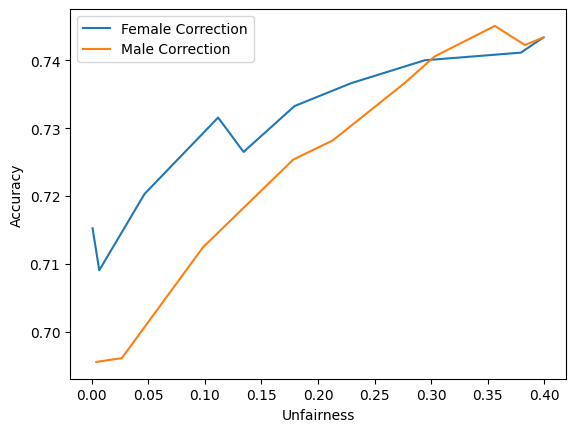

In [31]:
import matplotlib.pyplot as plt
plt.plot(female_unfairness_list, female_accuracy_list, label = "Female Correction")
plt.plot(male_unfairness_list, male_accuracy_list, label = "Male Correction")
plt.xlabel("Unfairness")
plt.ylabel("Accuracy")
plt.legend()

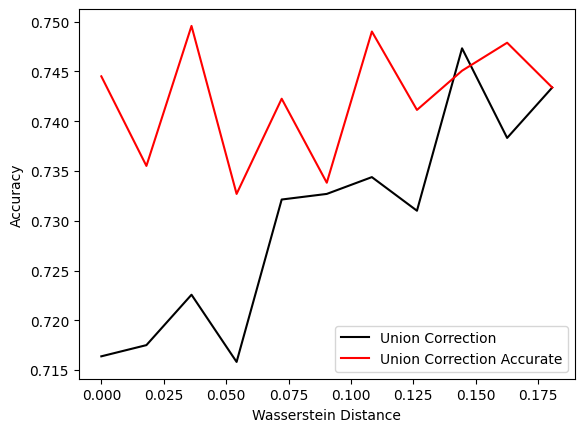

In [32]:
plt.plot(wasserstein_list, accuracy_list, label = "Union Correction", color='black')
plt.plot(wasserstein_list_accurate, accuracy_list_accurate, label = "Union Correction Accurate", color='red')
plt.xlabel("Wasserstein Distance")
plt.ylabel("Accuracy")
plt.legend()

In [33]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
temp = tsne.fit_transform(np.concatenate((X_train_male_proba, fairest_train_female_proba_new)))
X_train_male_proba_2d = temp[0:X_train_male_proba.shape[0]]
X_train_female_proba_temp_2d = temp[-fairest_train_female_proba_new.shape[0]:]

temp = tsne.fit_transform(np.concatenate((X_train_female_proba, fairest_train_male_proba_new)))
X_train_female_proba_2d = temp[0:X_train_female_proba.shape[0]]
X_train_male_proba_temp_2d = temp[-fairest_train_male_proba_new.shape[0]:]

In [36]:
import plotly.express as px

fig = px.scatter(x=X_train_male_proba_2d[:, 0], y=X_train_male_proba_2d[:, 1], color_discrete_sequence=['blue'])
fig2 = px.scatter(x=X_train_female_proba_temp_2d[:, 0], y=X_train_female_proba_temp_2d[:, 1], color_discrete_sequence=['red'])
fig.update_layout(
    title="t-SNE visualization of Corrected Female (Red) Proba + Old Male (blue) Proba (POT, train)",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig2.update_layout(
    title="t-SNE visualization of Old Female Proba",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.add_trace(fig2.data[0])
fig.show()

In [37]:
import plotly.express as px

fig = px.scatter(x=X_train_male_proba_temp_2d[:, 0], y=X_train_male_proba_temp_2d[:, 1], color_discrete_sequence=['blue'])
fig2 = px.scatter(x=X_train_female_proba_2d[:, 0] + 0.5, y=X_train_female_proba_2d[:, 1], color_discrete_sequence=['red'])
fig.update_layout(
    title="t-SNE visualization of Old Female (Red) Proba + Corrected Male (blue) Proba (POT, shifted female right for visualization)",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.add_trace(fig2.data[0])
fig.show()

In [38]:
def K(proba_i, proba_j, sigma):
    return np.exp(-norm(proba_i - proba_j, 2) ** 2 / (2 * sigma**2))


def reduce_bias_test(model, alpha_samples, union=False, accurateMatrix=False):
    alpha_list = (
        [i for i in range(min(11, alpha_samples))]
        if union
        else np.linspace(0, 1, alpha_samples)
    )
    X_train_male_proba = model.predict_proba(X_train_male)
    X_test_male_proba = model.predict_proba(X_test_male)
    X_train_female_proba = model.predict_proba(X_train_female)
    X_test_female_proba = model.predict_proba(X_test_female)

    X_test_male_proba_new = np.zeros(X_test_male_proba.shape)
    X_test_female_proba_new = np.zeros(X_test_female_proba.shape)

    fairest_X_test_male_proba_new = np.zeros(X_test_male_proba.shape)
    fairest_X_test_female_proba_new = np.zeros(X_test_female_proba.shape)

    print(
        "Baseline Accuracy: "
        + str(
            accuracy_score(
                np.concatenate((y_test_female, y_test_male)),
                np.concatenate(
                    (model.predict(X_test_female), model.predict(X_test_male))
                ),
            )
        )
    )

    X_test_male_prediction = model.predict(X_test_male)
    X_test_female_prediction = model.predict(X_test_female)

    X_test_male_distribution = list(
        np.unique(X_test_male_prediction, return_counts=True)
    )[1] / len(X_test_male_prediction)
    X_test_female_distribution = list(
        np.unique(X_test_female_prediction, return_counts=True)
    )[1] / len(X_test_female_prediction)

    test_difference = 0
    for i in range(2):
        test_difference += abs(
            X_test_male_distribution[i] - X_test_female_distribution[i]
        )
    print("Baseline Unfairness: " + str(test_difference))

    alpha = 1
    a = [
        (alpha) / (len(train_male))
        + (1 - alpha) / (len(train_male) + len(train_female))
    ] * len(train_male) + [((1 - alpha) / (len(train_male) + len(train_female)))] * len(
        train_female
    )
    b = [(1 - alpha) / (len(train_male) + len(train_female))] * len(train_male) + [
        (alpha / len(train_female))
        + (1 - alpha) / (len(train_male) + len(train_female))
    ] * len(train_female)
    print("Baseline Wasserstein Distance: " + str(ot.emd2(a, b, matrix_all)))

    male_accuracy_list = []
    male_unfairness_list = []
    female_accuracy_list = []
    female_unfairness_list = []

    accuracy_list = []
    unfairness_list = []
    wasserstein_list = []

    if not union:
        for alpha in alpha_list:
            T = globals()["T"]
            # Correcting Male Test Proba
            i = 0
            for test_proba in X_test_male_proba:
                T_test = np.zeros((len(train_female)))
                ind = 0
                sumK = 0
                for train_proba in X_train_male_proba:
                    T_test += K(test_proba, train_proba, 0.01) * T[ind]
                    sumK += K(test_proba, train_proba, 0.01)
                    ind += 1
                T_test /= sumK
                index = np.random.choice(
                    np.array(np.nonzero(T_test))[0],
                    1,
                    p=T_test[np.nonzero(T_test)] * len(train_male),
                )
                test_male_proba_temp = train_female_proba[index]
                test_male_proba_new = (1 - alpha) * (test_male_proba_temp) + alpha * (
                    test_proba
                )
                X_test_male_proba_new[i, :] = test_male_proba_new

                i += 1
            if alpha == alpha_list[0]:
                fairest_X_test_male_proba_new = X_test_male_proba_new.copy()
            index = 0
            y_pred_male_test = np.empty((len(X_test_male)))
            for proba in X_test_male_proba_new:
                y_pred_male_test[index] = np.argmax(proba)
                index += 1

            X_test_female_prediction = model.predict(X_test_female)

            X_test_male_distribution = list(
                np.resize(
                    (np.unique(y_pred_male_test, return_counts=True))[1]
                    / len(y_pred_male_test),
                    (2),
                )
            )
            X_test_female_distribution = list(
                np.resize(
                    (np.unique(X_test_female_prediction, return_counts=True))[1]
                    / len(X_test_female_prediction),
                    (2),
                )
            )
            test_difference = 0

            for i in range(2):
                test_difference += abs(
                    X_test_male_distribution[i] - X_test_female_distribution[i]
                )
            accuracy = accuracy_score(
                np.concatenate((y_test_female, y_test_male)),
                np.concatenate((model.predict(X_test_female), y_pred_male_test)),
            )
            unfairness = test_difference
            print("Corrected Male, Accuracy: " + str(accuracy))
            print("Corrected Male, Unfairness: " + str(test_difference))
            male_accuracy_list.append(accuracy)
            male_unfairness_list.append(unfairness)

            # Correcting Female Test Proba
            i = 0
            for test_proba in X_test_female_proba:
                T_test = np.zeros((len(train_male)))
                ind = 0
                sumK = 0
                for train_proba in X_train_female_proba:
                    T_test += K(test_proba, train_proba, 0.01) * T.transpose()[ind]
                    sumK += K(test_proba, train_proba, 0.01)
                    ind += 1
                T_test /= sumK
                index = 0
                index = np.random.choice(
                    np.array(np.nonzero(T_test))[0],
                    1,
                    p=T_test[np.nonzero(T_test)] * len(train_female),
                )
                test_female_proba_temp = train_male_proba[index]
                test_female_proba_new = (1 - alpha) * (
                    test_female_proba_temp
                ) + alpha * (test_proba)
                X_test_female_proba_new[i, :] = test_female_proba_new

                i += 1

            if alpha == alpha_list[0]:
                fairest_X_test_female_proba_new = X_test_female_proba_new.copy()
            index = 0
            y_pred_female_test = np.empty((len(X_test_female)))
            for proba in X_test_female_proba_new:
                y_pred_female_test[index] = np.argmax(proba)
                index += 1

            X_test_male_prediction = model.predict(X_test_male)

            X_test_male_distribution = list(
                np.resize(
                    (np.unique(X_test_male_prediction, return_counts=True))[1]
                    / len(X_test_male_prediction),
                    (2),
                )
            )
            X_test_female_distribution = list(
                np.resize(
                    (np.unique(y_pred_female_test, return_counts=True))[1]
                    / len(y_pred_female_test),
                    (2),
                )
            )
            test_difference = 0

            for i in range(2):
                test_difference += abs(
                    X_test_male_distribution[i] - X_test_female_distribution[i]
                )
            accuracy = accuracy_score(
                np.concatenate((y_test_female, y_test_male)),
                np.concatenate((model.predict(X_test_female), y_pred_male_test)),
            )
            unfairness = test_difference
            print("Corrected Female, Accuracy: " + str(accuracy))
            print("Corrected Female, Unfairness: " + str(test_difference))

            female_accuracy_list.append(accuracy)
            female_unfairness_list.append(unfairness)

        return (
            fairest_X_test_male_proba_new,
            fairest_X_test_female_proba_new,
            X_test_male_proba_new,
            X_test_female_proba_new,
            male_accuracy_list,
            male_unfairness_list,
            female_accuracy_list,
            female_unfairness_list,
        )
    else:
        for alpha in alpha_list:

            # Correcting Male Test Proba
            if accurateMatrix:
                T = T_male_to_all_accurate[alpha]
            else:
                print("in")
                T = T_male_to_all[alpha]

            i = 0
            for test_proba in X_test_male_proba:
                T_test = np.zeros((len(train_female) + len(train_male)))
                ind = 0
                sumK = 0
                for train_proba in X_train_male_proba:
                    T_test += K(test_proba, train_proba, 0.01) * T[ind]
                    sumK += K(test_proba, train_proba, 0.01)
                    ind += 1
                T_test /= sumK
                index = np.random.choice(
                    np.array(np.nonzero(T_test))[0],
                    1,
                    p=T_test[np.nonzero(T_test)] * len(train_male),
                )
                if index < len(train_female):
                    X_test_male_proba_new[i, :] = train_female_proba[index]
                else:
                    index -= len(train_female)
                    X_test_male_proba_new[i, :] = train_male_proba[index]

                i += 1
            index = 0
            y_pred_male_test = np.empty((len(X_test_male)))
            for proba in X_test_male_proba_new:
                y_pred_male_test[index] = np.argmax(proba)
                index += 1

            # Correcting Female Test Proba
            if accurateMatrix:
                T = T_female_to_all_accurate[alpha]
            else:
                T = T_female_to_all[alpha]
            i = 0
            for test_proba in X_test_female_proba:
                T_test = np.zeros((len(train_male) + len(train_female)))
                ind = 0
                sumK = 0
                for train_proba in X_train_female_proba:
                    T_test += K(test_proba, train_proba, 0.01) * T[ind]
                    sumK += K(test_proba, train_proba, 0.01)
                    ind += 1
                T_test /= sumK
                index = 0
                index = np.random.choice(
                    np.array(np.nonzero(T_test))[0],
                    1,
                    p=T_test[np.nonzero(T_test)] * len(train_female),
                )
                if index < len(train_male):
                    X_test_female_proba_new[i, :] = train_male_proba[index]
                else:
                    index -= len(train_male)
                    X_test_female_proba_new[i, :] = train_female_proba[index]

                i += 1

            index = 0
            y_pred_female_test = np.empty((len(X_test_female)))
            for proba in X_test_female_proba_new:
                y_pred_female_test[index] = np.argmax(proba)
                index += 1

            X_test_male_distribution = list(
                np.resize(
                    (np.unique(y_pred_male_test, return_counts=True))[1]
                    / len(y_pred_male_test),
                    (2),
                )
            )
            X_test_female_distribution = list(
                np.resize(
                    (np.unique(y_pred_female_test, return_counts=True))[1]
                    / len(y_pred_female_test),
                    (2),
                )
            )

            test_difference = 0
            for i in range(2):
                test_difference += abs(
                    X_test_male_distribution[i] - X_test_female_distribution[i]
                )

            alpha = alpha / 10
            a = [
                (alpha) / (len(train_male))
                + (1 - alpha) / (len(train_male) + len(train_female))
            ] * len(train_male) + [
                ((1 - alpha) / (len(train_male) + len(train_female)))
            ] * len(
                train_female
            )
            b = [(1 - alpha) / (len(train_male) + len(train_female))] * len(
                train_male
            ) + [
                (alpha / len(train_female))
                + (1 - alpha) / (len(train_male) + len(train_female))
            ] * len(
                train_female
            )

            wasserstein_distance = ot.emd2(a, b, matrix_all)
            accuracy = accuracy_score(
                np.concatenate((y_test_female, y_test_male)),
                np.concatenate((y_pred_female_test, y_pred_male_test)),
            )
            unfairness = test_difference
            print("Corrected Accuracy: " + str(accuracy))
            print("Corrected Unfairness: " + str(test_difference))
            print("Corrected Wasserstein Distance: " + str(wasserstein_distance))

            accuracy_list.append(accuracy)
            unfairness_list.append(unfairness)
            wasserstein_list.append(wasserstein_distance)

        return accuracy_list, unfairness_list, wasserstein_list


In [39]:
fairest_X_test_male_proba_new, fairest_X_test_female_proba_new, X_test_male_proba_new, X_test_female_proba_new, test_male_accuracy_list, test_male_unfairness_list, test_female_accuracy_list, test_female_unfairness_list = reduce_bias_test(logreg, 10)

Baseline Accuracy: 0.748314606741573
Baseline Unfairness: 0.4438088283024991
Baseline Wasserstein Distance: 0.18065156532656418
Corrected Male, Accuracy: 0.7191011235955056
Corrected Male, Unfairness: 0.08093962999026294
Corrected Female, Accuracy: 0.7191011235955056
Corrected Female, Unfairness: 0.0015011359948067793
Corrected Male, Accuracy: 0.698876404494382
Corrected Male, Unfairness: 0.08937844855566374
Corrected Female, Accuracy: 0.698876404494382
Corrected Female, Unfairness: 0.011116520610191416
Corrected Male, Accuracy: 0.7280898876404495
Corrected Male, Unfairness: 0.2159607270366764
Corrected Female, Accuracy: 0.7280898876404495
Corrected Female, Unfairness: 0.0015011359948067793
Corrected Male, Accuracy: 0.7325842696629213
Corrected Male, Unfairness: 0.2497160012982798
Corrected Female, Accuracy: 0.7325842696629213
Corrected Female, Unfairness: 0.0784242129178837
Corrected Male, Accuracy: 0.7348314606741573
Corrected Male, Unfairness: 0.2412771827328789
Corrected Female, Ac

In [41]:
accuracy_list, unfairness_list, wasserstein_list = reduce_bias_test(logreg, 11, True)

Baseline Accuracy: 0.748314606741573
Baseline Unfairness: 0.4438088283024991
Baseline Wasserstein Distance: 0.18065156532656418
in
Corrected Accuracy: 0.7393258426966293
Corrected Unfairness: 0.009331385913664392
Corrected Wasserstein Distance: 0.0
in
Corrected Accuracy: 0.7370786516853932
Corrected Unfairness: 0.10333495618305744
Corrected Wasserstein Distance: 0.018065156532656244
in
Corrected Accuracy: 0.748314606741573
Corrected Unfairness: 0.17534891269068487
Corrected Wasserstein Distance: 0.036130313065312746
in
Corrected Accuracy: 0.7528089887640449
Corrected Unfairness: 0.06231742940603707
Corrected Wasserstein Distance: 0.05419546959796903
in
Corrected Accuracy: 0.7573033707865169
Corrected Unfairness: 0.22833495618305744
Corrected Wasserstein Distance: 0.07226062613062557
in
Corrected Accuracy: 0.7348314606741573
Corrected Unfairness: 0.22480525803310614
Corrected Wasserstein Distance: 0.09032578266328162
in
Corrected Accuracy: 0.7438202247191011
Corrected Unfairness: 0.2248

In [42]:
accuracy_list_accurate, unfairness_list_accurate, wasserstein_list_accurate = reduce_bias_test(logreg, 11, True, True)

Baseline Accuracy: 0.748314606741573
Baseline Unfairness: 0.4438088283024991
Baseline Wasserstein Distance: 0.18065156532656418
Corrected Accuracy: 0.7595505617977528
Corrected Unfairness: 0.0049902629016552735
Corrected Wasserstein Distance: 0.0
Corrected Accuracy: 0.7348314606741573
Corrected Unfairness: 0.009899383317104826
Corrected Wasserstein Distance: 0.018065156532656244
Corrected Accuracy: 0.7415730337078652
Corrected Unfairness: 0.15985069782538136
Corrected Wasserstein Distance: 0.036130313065312746
Corrected Accuracy: 0.7303370786516854
Corrected Unfairness: 0.18752028562155143
Corrected Wasserstein Distance: 0.05419546959796903
Corrected Accuracy: 0.7280898876404495
Corrected Unfairness: 0.18025803310613436
Corrected Wasserstein Distance: 0.07226062613062557
Corrected Accuracy: 0.7617977528089888
Corrected Unfairness: 0.21381045115222336
Corrected Wasserstein Distance: 0.09032578266328162
Corrected Accuracy: 0.7662921348314606
Corrected Unfairness: 0.2801444336254464
Corre

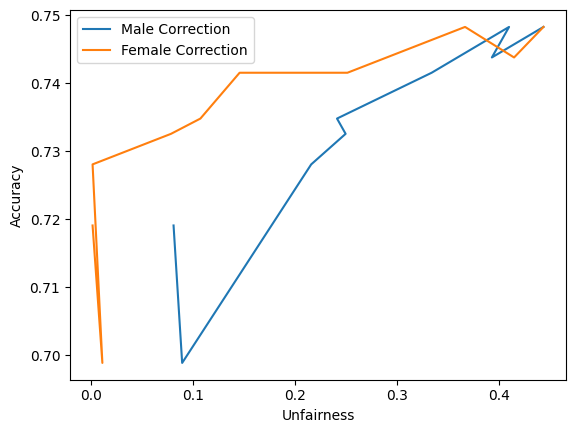

In [49]:
plt.plot(test_male_unfairness_list, test_male_accuracy_list, label = 'Male Correction')
plt.plot(test_female_unfairness_list, test_female_accuracy_list, label = 'Female Correction')
plt.xlabel("Unfairness")
plt.ylabel("Accuracy")
plt.legend()

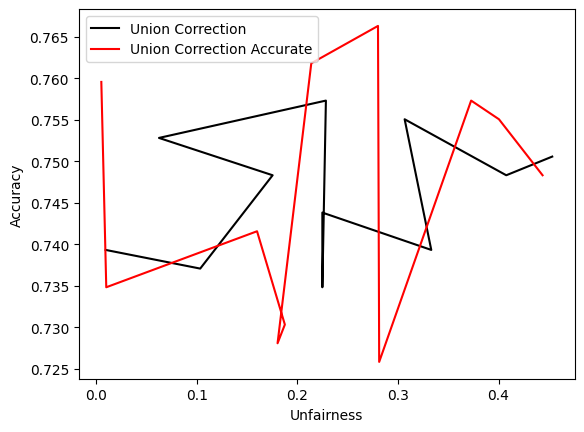

In [44]:
plt.plot(unfairness_list, accuracy_list, label = 'Union Correction', color = 'black')
plt.plot(unfairness_list_accurate, accuracy_list_accurate, label = 'Union Correction Accurate', color = 'red')
plt.xlabel("Unfairness")
plt.ylabel("Accuracy")
plt.legend()

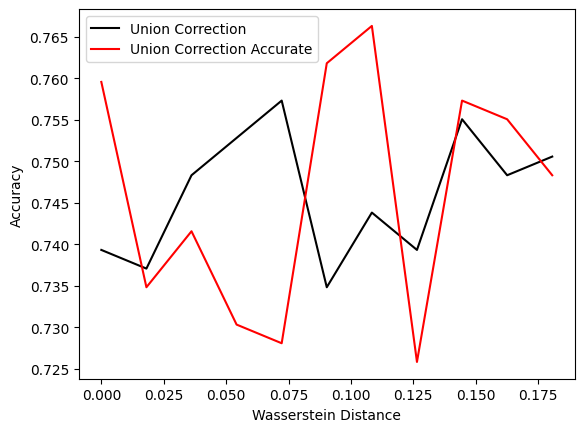

In [45]:
plt.plot(wasserstein_list, accuracy_list, label = 'Union Correction', color = 'black')
plt.plot(wasserstein_list_accurate, accuracy_list_accurate, label = 'Union Correction Accurate', color = 'red')
plt.xlabel("Wasserstein Distance")
plt.ylabel("Accuracy")
plt.legend()

In [46]:
temp = tsne.fit_transform(np.concatenate((X_test_male_proba, fairest_X_test_female_proba_new)))
X_test_male_proba_2d = temp[0:X_test_male_proba.shape[0]]
X_test_female_proba_temp_2d = temp[-fairest_X_test_female_proba_new.shape[0]:]

temp = tsne.fit_transform(np.concatenate((X_test_female_proba, fairest_X_test_male_proba_new)))
X_test_female_proba_2d = temp[0:X_test_female_proba.shape[0]]
X_test_male_proba_temp_2d = temp[-fairest_X_test_male_proba_new.shape[0]:]

X_test_male_proba_2d

array([[ 6.25285196e+00, -2.60353750e-13],
       [ 1.94776802e+01,  5.46204961e-17],
       [-8.64476776e+00,  1.32289733e-14],
       [-1.03316336e+01, -8.85400469e-16],
       [ 2.69507670e+00,  4.75408395e-13],
       [-2.19077358e+01, -4.20659805e-18],
       [-8.98243904e+00,  9.32384900e-15],
       [ 1.13297834e+01,  1.17204931e-14],
       [-6.84000206e+00,  5.06711118e-15],
       [ 1.70089283e+01,  8.59101380e-17],
       [-1.90522823e+01,  1.35550186e-17],
       [ 8.41384029e+00, -2.96464445e-14],
       [-9.57815266e+00,  3.41904172e-15],
       [ 7.90284574e-01, -4.57531690e-13],
       [ 4.70764208e+00,  2.68949414e-13],
       [-4.60962534e+00, -7.52258770e-14],
       [ 1.47564459e+01, -3.12246758e-16],
       [ 2.20930595e+01,  6.79564740e-17],
       [-6.72646952e+00,  6.77389983e-16],
       [ 9.35419750e+00,  2.39044421e-14],
       [ 2.19407597e+01,  6.98459133e-17],
       [-1.59781561e+01, -2.02176190e-16],
       [ 1.93494816e+01,  5.50770468e-17],
       [-6.

In [47]:
import plotly.express as px

fig = px.scatter(x=X_test_male_proba_2d[:, 0], y=X_test_male_proba_2d[:, 1], color_discrete_sequence=['blue'])
fig2 = px.scatter(x=X_test_female_proba_temp_2d[:, 0], y=X_test_female_proba_temp_2d[:, 1], color_discrete_sequence=['red'])
fig.update_layout(
    title="t-SNE visualization of Corrected Female (Red) Proba + Old Male (blue) Proba (POT, test)",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.add_trace(fig2.data[0])
fig.show()

In [48]:
fig = px.scatter(x=X_test_male_proba_temp_2d[:, 0], y=X_test_male_proba_temp_2d[:, 1], color_discrete_sequence=['blue'])
fig2 = px.scatter(x=X_test_female_proba_2d[:, 0], y=X_test_female_proba_2d[:, 1], color_discrete_sequence=['red'])
fig.update_layout(
    title="t-SNE visualization of Old Female (Red) Proba + Corrected Male (blue) Proba (POT, test)",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.add_trace(fig2.data[0])
fig.show()